# Project Name - Crowdedness at the Campus Gym

Discription:-
The dataset consists of 26,000 people counts (about every 10 minutes) over the last year. In addition, I gathered extra info including weather and semester-specific information that might affect how crowded it is. The label is the number of people, which I'd like to predict given some subset of the features.

Label:
Number of people

Features:

date (string; datetime of data)

timestamp (int; number of seconds since beginning of day)

dayofweek (int; 0 [monday] - 6 [sunday])

is_weekend (int; 0 or 1) [boolean, if 1, it's either saturday or sunday, otherwise 0]

is_holiday (int; 0 or 1) [boolean, if 1 it's a federal holiday, 0 otherwise]

temperature (float; degrees fahrenheit)

isstartof_semester (int; 0 or 1) [boolean, if 1 it's the beginning of a school semester, 0 otherwise]

month (int; 1 [jan] - 12 [dec])

hour (int; 0 - 23)

In [18]:
import numpy as np 
import pandas as pd 
import datetime

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [20]:
data=pd.read_csv("C:\\Users\\admin\\Downloads\\archive (3)\\data.csv")

In [21]:
data.head(5)

,number_people,date,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
0,37,2015-08-14 17:00:11-07:00,61211,4,0,0,71.76,0,0,8,17
1,45,2015-08-14 17:20:14-07:00,62414,4,0,0,71.76,0,0,8,17
2,40,2015-08-14 17:30:15-07:00,63015,4,0,0,71.76,0,0,8,17
3,44,2015-08-14 17:40:16-07:00,63616,4,0,0,71.76,0,0,8,17
4,45,2015-08-14 17:50:17-07:00,64217,4,0,0,71.76,0,0,8,17


In [22]:
data.describe()

,number_people,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
count,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000
mean,29.072543,45799.437958,2.982504,0.282870,0.002573,58.557108,0.078831,0.660218,7.439824,12.236460
std,22.689026,24211.275891,1.996825,0.450398,0.050660,6.316396,0.269476,0.473639,3.445069,6.717631
min,0.000000,0.000000,0.000000,0.000000,0.000000,38.140000,0.000000,0.000000,1.000000,0.000000
25%,9.000000,26624.000000,1.000000,0.000000,0.000000,55.000000,0.000000,0.000000,5.000000,7.000000
50%,28.000000,46522.500000,3.000000,0.000000,0.000000,58.340000,0.000000,1.000000,8.000000,12.000000
75%,43.000000,66612.000000,5.000000,1.000000,0.000000,62.280000,0.000000,1.000000,10.000000,18.000000
max,145.000000,86399.000000,6.000000,1.000000,1.000000,87.170000,1.000000,1.000000,12.000000,23.000000


In [23]:
data.corr()

,number_people,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
number_people,1.000000,0.550218,-0.162062,-0.173958,-0.048249,0.373327,0.182683,0.335350,-0.097854,0.552049
timestamp,0.550218,1.000000,-0.001793,-0.000509,0.002851,0.184849,0.009551,0.044676,-0.023221,0.999077
day_of_week,-0.162062,-0.001793,1.000000,0.791338,-0.075862,0.011169,-0.011782,-0.004824,0.015559,-0.001914
is_weekend,-0.173958,-0.000509,0.791338,1.000000,-0.031899,0.020673,-0.016646,-0.036127,0.008462,-0.000517
is_holiday,-0.048249,0.002851,-0.075862,-0.031899,1.000000,-0.088527,-0.014858,-0.070798,-0.094942,0.002843
temperature,0.373327,0.184849,0.011169,0.020673,-0.088527,1.000000,0.093242,0.152476,0.063125,0.185121
is_start_of_semester,0.182683,0.009551,-0.011782,-0.016646,-0.014858,0.093242,1.000000,0.209862,-0.137160,0.010091
is_during_semester,0.335350,0.044676,-0.004824,-0.036127,-0.070798,0.152476,0.209862,1.000000,0.096556,0.045581
month,-0.097854,-0.023221,0.015559,0.008462,-0.094942,0.063125,-0.137160,0.096556,1.000000,-0.023624
hour,0.552049,0.999077,-0.001914,-0.000517,0.002843,0.185121,0.010091,0.045581,-0.023624,1.000000


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62184 entries, 0 to 62183
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   number_people         62184 non-null  int64  
 1   date                  62184 non-null  object 
 2   timestamp             62184 non-null  int64  
 3   day_of_week           62184 non-null  int64  
 4   is_weekend            62184 non-null  int64  
 5   is_holiday            62184 non-null  int64  
 6   temperature           62184 non-null  float64
 7   is_start_of_semester  62184 non-null  int64  
 8   is_during_semester    62184 non-null  int64  
 9   month                 62184 non-null  int64  
 10  hour                  62184 non-null  int64  
dtypes: float64(1), int64(9), object(1)
memory usage: 5.2+ MB


In [25]:
data=data.drop("date",axis=1)


In [26]:
data.head()

,number_people,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
0,37,61211,4,0,0,71.76,0,0,8,17
1,45,62414,4,0,0,71.76,0,0,8,17
2,40,63015,4,0,0,71.76,0,0,8,17
3,44,63616,4,0,0,71.76,0,0,8,17
4,45,64217,4,0,0,71.76,0,0,8,17


In [27]:
data['temperature'] = np.round(data['temperature']) 
data['temperature'] = data['temperature'].astype('int64') 

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62184 entries, 0 to 62183
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   number_people         62184 non-null  int64
 1   timestamp             62184 non-null  int64
 2   day_of_week           62184 non-null  int64
 3   is_weekend            62184 non-null  int64
 4   is_holiday            62184 non-null  int64
 5   temperature           62184 non-null  int64
 6   is_start_of_semester  62184 non-null  int64
 7   is_during_semester    62184 non-null  int64
 8   month                 62184 non-null  int64
 9   hour                  62184 non-null  int64
dtypes: int64(10)
memory usage: 4.7 MB


number_people


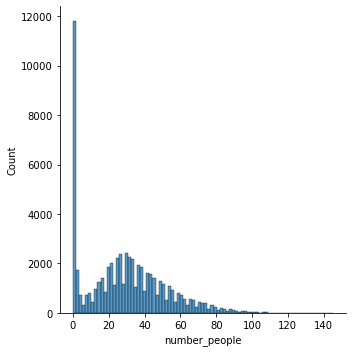

timestamp


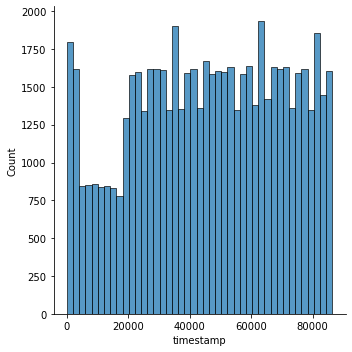

day_of_week


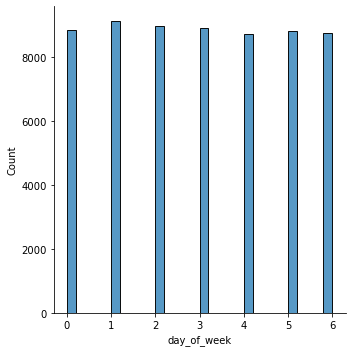

is_weekend


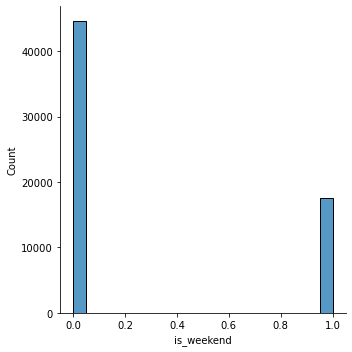

is_holiday


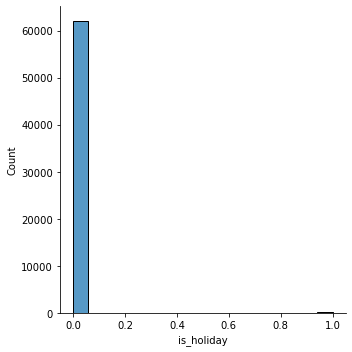

temperature


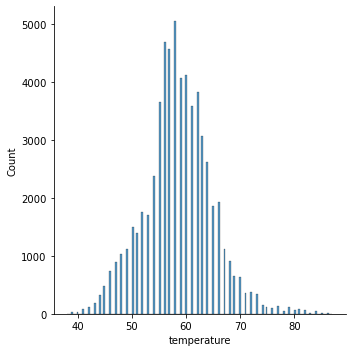

is_start_of_semester


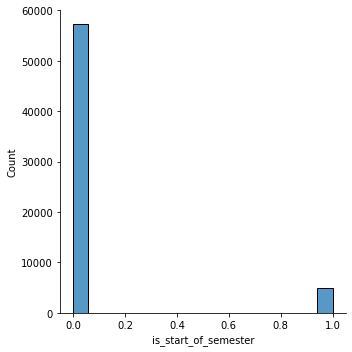

is_during_semester


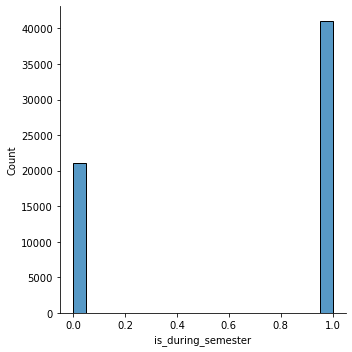

month


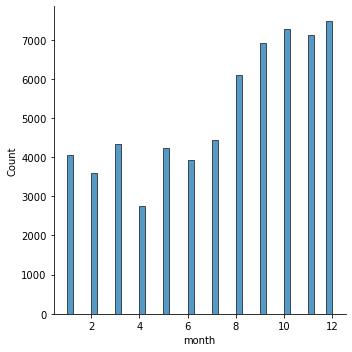

hour


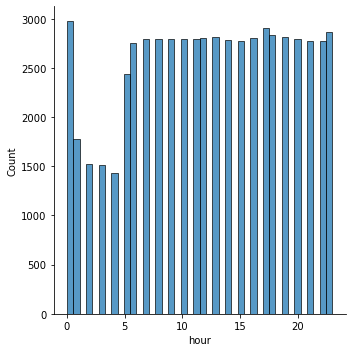

In [29]:
def univariant(frame):
    for i in frame.columns:
        
            print(i)
            sns.displot(x=frame[i])
            plt.show()
                
        
            
univariant(data)

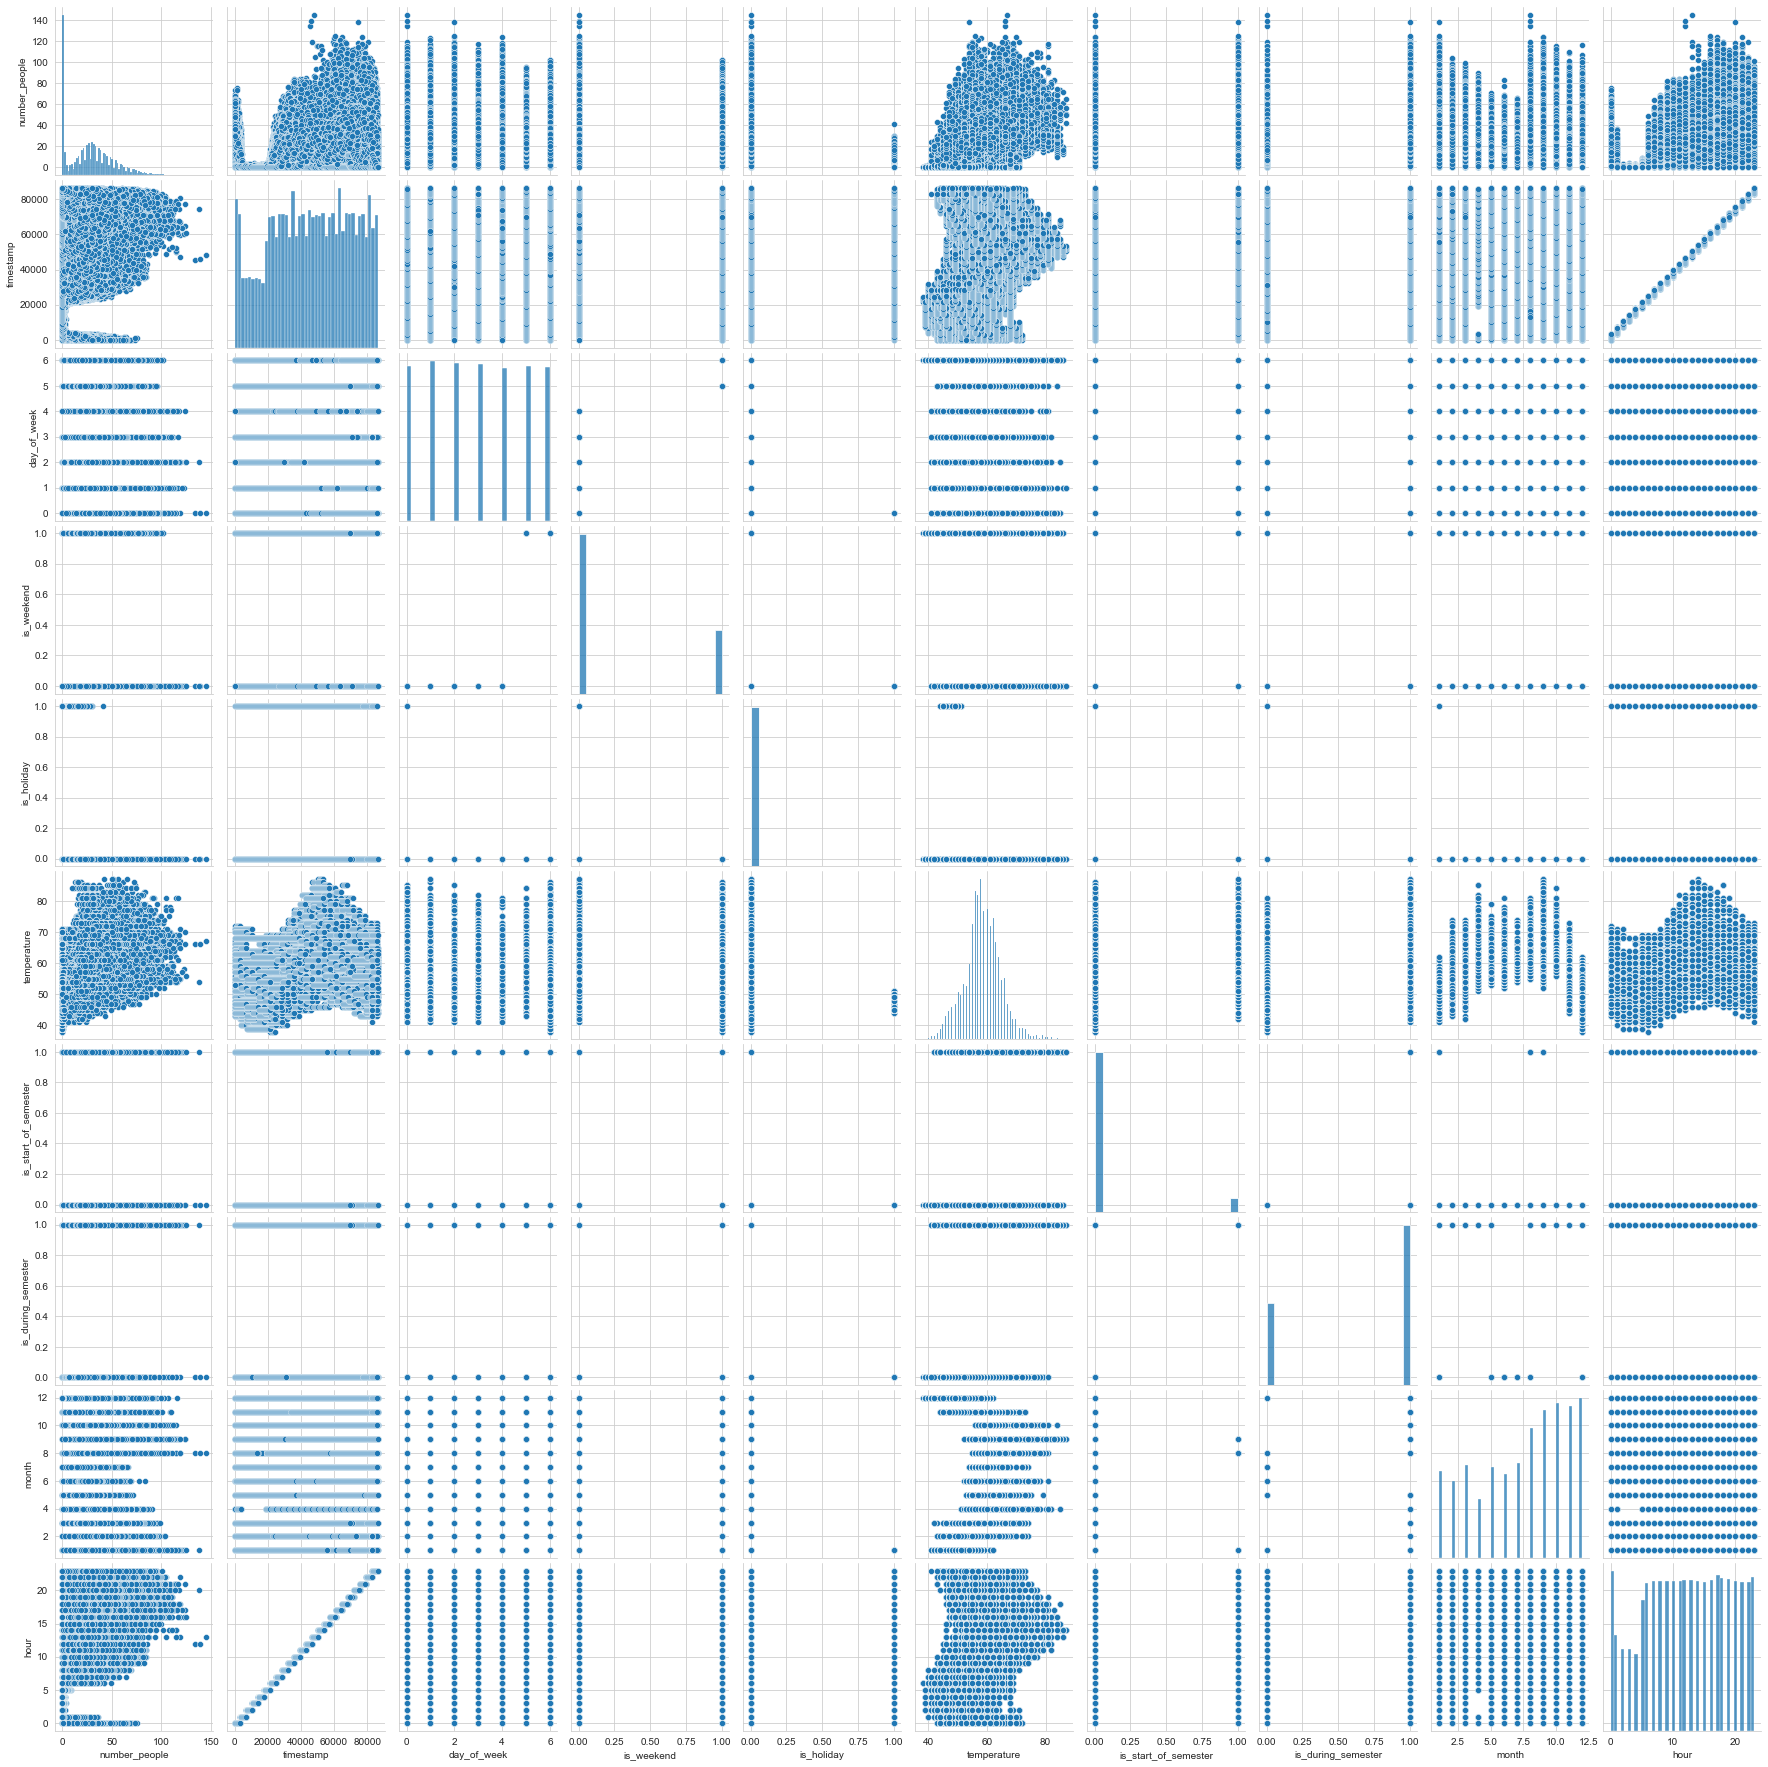

In [175]:
sns.pairplot(data)

In [30]:
X = data.drop('number_people', axis=1) # Predictors
y = data['number_people'] # Target Variable

In [31]:
X

,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
0,61211,4,0,0,72,0,0,8,17
1,62414,4,0,0,72,0,0,8,17
2,63015,4,0,0,72,0,0,8,17
3,63616,4,0,0,72,0,0,8,17
4,64217,4,0,0,72,0,0,8,17
...,...,...,...,...,...,...,...,...,...
62179,67348,5,1,0,61,0,1,3,18
62180,67955,5,1,0,61,0,1,3,18
62181,68560,5,1,0,57,0,1,3,19
62182,69167,5,1,0,57,0,1,3,19


In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X=scaler.fit_transform(X)
X


array([[ 0.63654993,  0.50956119, -0.6280507 , ..., -1.39393832,
         0.16260365,  0.70911589],
       [ 0.68623792,  0.50956119, -0.6280507 , ..., -1.39393832,
         0.16260365,  0.70911589],
       [ 0.71106127,  0.50956119, -0.6280507 , ..., -1.39393832,
         0.16260365,  0.70911589],
       ...,
       [ 0.94008862,  1.01036016,  1.59222814, ...,  0.71739186,
        -1.28875789,  1.0068423 ],
       [ 0.96515979,  1.01036016,  1.59222814, ...,  0.71739186,
        -1.28875789,  1.0068423 ],
       [ 0.99010704,  1.01036016,  1.59222814, ...,  0.71739186,
        -1.28875789,  1.0068423 ]])

In [33]:

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size=0.3, random_state=1)


In [48]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error 
from sklearn.model_selection import cross_val_score 
from sklearn.feature_selection import SelectFromModel 

In [181]:
rf = RandomForestRegressor()
rf.fit(X_train, Y_train)

RandomForestRegressor()

In [182]:
rf_pred = rf.predict(X_test)
mean_squared_error(Y_test, rf_pred, squared=False)

8.744514364370268

In [183]:
from sklearn.metrics import r2_score
r2_score(Y_test, rf_pred)

0.8530354328967903

In [184]:
#validation curve
from sklearn.model_selection import validation_curve
sns.set_style('whitegrid')

In [185]:
train_scores, valid_scores = validation_curve(rf, X, y, param_name="max_depth", n_jobs=-1,
      param_range=np.arange(1, 11), cv=10, scoring='r2')                                           

In [186]:
train_scores

array([[0.39047622, 0.37217086, 0.38744799, 0.36939954, 0.36747797,
        0.35923944, 0.36061808, 0.35633299, 0.36881255, 0.39440215],
       [0.49588844, 0.48016084, 0.48448956, 0.48554492, 0.47191261,
        0.47553129, 0.47100429, 0.48653262, 0.51270286, 0.49318347],
       [0.57013263, 0.56940509, 0.55279316, 0.55174427, 0.54095016,
        0.53893901, 0.54478762, 0.55415457, 0.58073303, 0.54929976],
       [0.61583674, 0.6172192 , 0.6089285 , 0.60418988, 0.59546874,
        0.59045964, 0.59377163, 0.61601909, 0.63124483, 0.60242849],
       [0.66643185, 0.66230363, 0.65082293, 0.65105297, 0.64240477,
        0.63592087, 0.64099464, 0.65844297, 0.67695298, 0.65513342],
       [0.71002123, 0.7028914 , 0.68405734, 0.68624068, 0.68175454,
        0.67534932, 0.68323414, 0.69680963, 0.70657189, 0.68586256],
       [0.73630104, 0.73013881, 0.70588691, 0.71533399, 0.7034941 ,
        0.69741008, 0.71553533, 0.72760255, 0.73180759, 0.70853233],
       [0.75461604, 0.75688447, 0.7277137

In [187]:
valid_scores

array([[-0.24456046,  0.0969308 ,  0.20509409,  0.24383134,  0.17539505,
         0.43100735,  0.46181465,  0.59337098,  0.13776913, -1.01898103],
       [-0.00638219,  0.30091606,  0.41508106,  0.36483007,  0.52782971,
         0.48925353,  0.6397514 ,  0.38370311, -0.49044431, -0.41706999],
       [-0.02786487, -0.12820098,  0.42346407,  0.46525698,  0.5150602 ,
         0.61534392,  0.30542619,  0.42131358, -0.48154697, -0.02639618],
       [ 0.04377092, -0.02231715,  0.44781075,  0.51848099,  0.56814336,
         0.64434932,  0.23757138,  0.38482885, -0.37985394,  0.02947253],
       [ 0.09922336,  0.01838135,  0.49124717,  0.54695651,  0.61106545,
         0.7305258 ,  0.20081668,  0.34964156, -0.39870122, -0.00408255],
       [ 0.15024756,  0.06639321,  0.52128264,  0.57166724,  0.61221324,
         0.76476527,  0.15817039,  0.37794965, -0.23070887, -0.07228039],
       [ 0.18073038,  0.07131505,  0.49007976,  0.60034102,  0.65176119,
         0.80543407,  0.10822861,  0.3495244 

In [188]:
train_mean=np.mean(train_scores,axis=1)
train_std=np.std(train_scores,axis=1)

In [189]:
test_mean=np.mean(valid_scores,axis=1)
test_std=np.std(valid_scores,axis=1)

In [190]:
param_range=np.arange(1, 11)

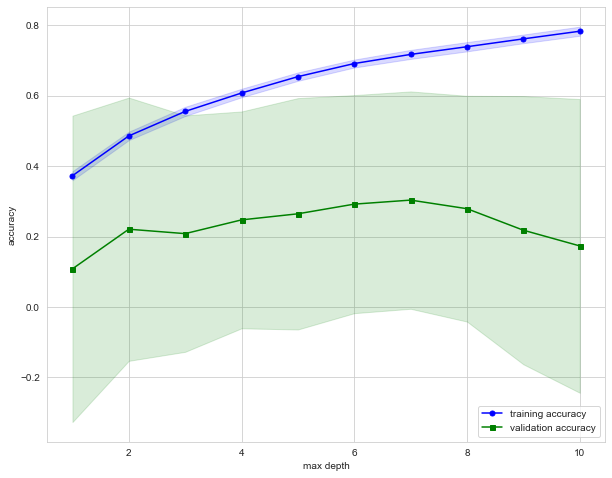

In [191]:
plt.figure(figsize=(10,8))
plt.plot(param_range,train_mean,color='blue',marker='o',markersize=5,label='training accuracy')
plt.fill_between(param_range,train_mean+train_std,train_mean-train_std,alpha=0.15,color='blue')
plt.plot(param_range,test_mean,color='green',marker='s',markersize=5,label='validation accuracy')
plt.fill_between(param_range,test_mean+test_std,test_mean-test_std,alpha=0.15,color='green')
plt.legend(loc='lower right')
plt.xlabel("max depth")
plt.ylabel("accuracy")
plt.show()

In [59]:
#learning curve
from sklearn.model_selection import learning_curve

In [193]:
train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(rf, X, y, cv=10, n_jobs=4,
                       train_sizes=np.linspace(.1, 1.0, 5),
                       return_times=True)

In [194]:
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)


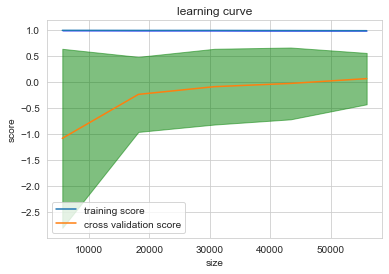

In [195]:
plt.plot(train_sizes,train_scores_mean,label="training score")
plt.fill_between(train_sizes,train_scores_mean-train_scores_std,train_scores_mean+train_scores_std,color='blue',alpha=0.5)
plt.plot(train_sizes,test_scores_mean,label='cross validation score')

plt.fill_between(train_sizes,test_scores_mean-test_scores_std,test_scores_mean+test_scores_std,color='green',alpha=0.5)



plt.title("learning curve")
plt.xlabel("size")
plt.ylabel("score")
plt.legend(loc="best")
plt.show()

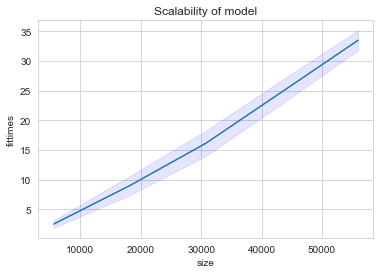

In [196]:
plt.plot(train_sizes,fit_times_mean)
plt.fill_between(train_sizes,fit_times_mean-fit_times_std,fit_times_mean+fit_times_std,color='blue',alpha=0.1)


plt.title("Scalability of model")
plt.xlabel("size")
plt.ylabel("fittimes")

plt.show()

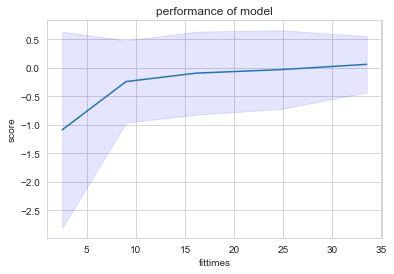

In [197]:
plt.plot(fit_times_mean, test_scores_mean)
plt.fill_between(fit_times_mean,test_scores_mean-test_scores_std,test_scores_mean+test_scores_std,color='blue',alpha=0.1)


plt.title("performance of model")
plt.xlabel("fittimes")
plt.ylabel("score")

plt.show()

In [34]:
from sklearn.decomposition import PCA

In [35]:
pca=PCA()

In [36]:
X_train= pca.fit_transform(X_train)

In [37]:
pca.explained_variance_ratio_

array([2.32466486e-01, 2.00335058e-01, 1.45669514e-01, 1.28606780e-01,
       9.95742410e-02, 9.23519145e-02, 7.77160934e-02, 2.31774082e-02,
       1.02504497e-04])

In [38]:
#now lets do pca analysis

X=data.drop(['number_people','hour'], axis=1) 
y = data['number_people'] # Target Variable


In [39]:
X


,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month
0,61211,4,0,0,72,0,0,8
1,62414,4,0,0,72,0,0,8
2,63015,4,0,0,72,0,0,8
3,63616,4,0,0,72,0,0,8
4,64217,4,0,0,72,0,0,8
...,...,...,...,...,...,...,...,...
62179,67348,5,1,0,61,0,1,3
62180,67955,5,1,0,61,0,1,3
62181,68560,5,1,0,57,0,1,3
62182,69167,5,1,0,57,0,1,3


In [40]:
#lets use robust scaler this time
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X=scaler.fit_transform(X)
X


array([[ 0.3673227 ,  0.25      ,  0.        , ...,  0.        ,
        -1.        ,  0.        ],
       [ 0.39740672,  0.25      ,  0.        , ...,  0.        ,
        -1.        ,  0.        ],
       [ 0.41243623,  0.25      ,  0.        , ...,  0.        ,
        -1.        ,  0.        ],
       ...,
       [ 0.55110283,  0.5       ,  1.        , ...,  0.        ,
         0.        , -1.        ],
       [ 0.56628238,  0.5       ,  1.        , ...,  0.        ,
         0.        , -1.        ],
       [ 0.58138692,  0.5       ,  1.        , ...,  0.        ,
         0.        , -1.        ]])

In [41]:
X


array([[ 0.3673227 ,  0.25      ,  0.        , ...,  0.        ,
        -1.        ,  0.        ],
       [ 0.39740672,  0.25      ,  0.        , ...,  0.        ,
        -1.        ,  0.        ],
       [ 0.41243623,  0.25      ,  0.        , ...,  0.        ,
        -1.        ,  0.        ],
       ...,
       [ 0.55110283,  0.5       ,  1.        , ...,  0.        ,
         0.        , -1.        ],
       [ 0.56628238,  0.5       ,  1.        , ...,  0.        ,
         0.        , -1.        ],
       [ 0.58138692,  0.5       ,  1.        , ...,  0.        ,
         0.        , -1.        ]])

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size=0.3, random_state=1)


In [43]:
# log transformation

In [44]:
group = data.groupby(data['is_holiday'])['number_people'].count()
group

is_holiday
0    62024
1      160
Name: number_people, dtype: int64

In [45]:

l = list(y) #First storing a feature in a list
new_y = [] #Creating a list to store new converted values
for i in l:
    if(i == 0):
        new_y.append(0) #if the value is 0 then i keep this as 0
        
    elif(i > 0):
        new_y.append(np.log(i)) #if the value is greater 0 then i will convert the value to log

new_y = pd.Series(new_y) #finally converting list to pandas series


In [46]:
 X_train, X_test, Y_train, Y_test= train_test_split(X,new_y, test_size=0.3, random_state=1)

In [49]:
new_rf = RandomForestRegressor()
new_rf.fit(X_train, Y_train)


RandomForestRegressor()

In [50]:
new_rf_pred = new_rf.predict(X_test)
mean_squared_error(Y_test, new_rf_pred, squared=False) #before error was 8.733029549874958

0.3844156007692065

In [52]:
from sklearn.metrics import r2_score
r2_score(Y_test, new_rf_pred) #before r2 was 0.8534212181615541

0.9337627650895418

In [53]:
rf_cross = cross_val_score(estimator=new_rf, X=X_train, y=Y_train, cv=5)
np.mean(rf_cross)

0.929695622914573

In [224]:
#validation curve
train_scores, valid_scores = validation_curve(new_rf, X, new_y, param_name="max_depth", n_jobs=-1,
      param_range=np.arange(1, 11), cv=10, scoring='r2')                                           

In [225]:
train_mean=np.mean(train_scores,axis=1)
train_std=np.std(train_scores,axis=1)
test_mean=np.mean(valid_scores,axis=1)
test_std=np.std(valid_scores,axis=1)

In [226]:
param_range=np.arange(1, 11)

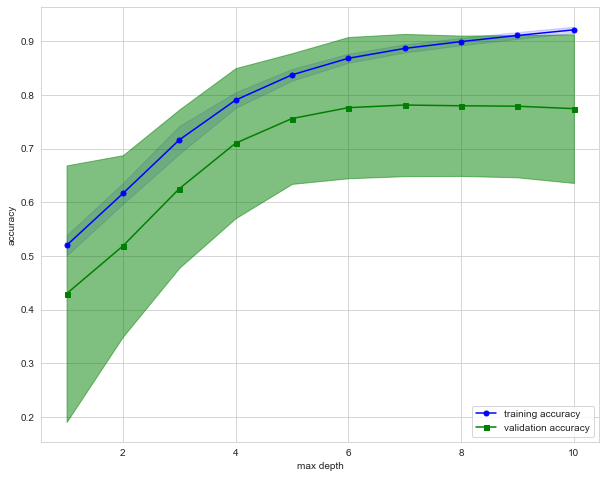

In [227]:

plt.figure(figsize=(10,8))
plt.plot(param_range,train_mean,color='blue',marker='o',markersize=5,label='training accuracy')
plt.fill_between(param_range,train_mean+train_std,train_mean-train_std,alpha=0.15,color='blue')
plt.plot(param_range,test_mean,color='green',marker='s',markersize=5,label='validation accuracy')
plt.fill_between(param_range,test_mean+test_std,test_mean-test_std,alpha=0.50,color='green')
plt.legend(loc='lower right')
plt.xlabel("max depth")
plt.ylabel("accuracy")
plt.show()

In [228]:
train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(new_rf, X, new_y, cv=10, n_jobs=4,
                       train_sizes=np.linspace(.1, 1.0, 5),
                       return_times=True)

In [229]:
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)


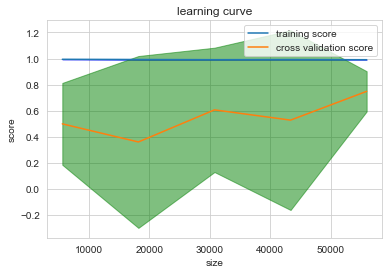

In [230]:
plt.plot(train_sizes,train_scores_mean,label="training score")
plt.fill_between(train_sizes,train_scores_mean-train_scores_std,train_scores_mean+train_scores_std,color='blue',alpha=0.5)
plt.plot(train_sizes,test_scores_mean,label='cross validation score')

plt.fill_between(train_sizes,test_scores_mean-test_scores_std,test_scores_mean+test_scores_std,color='green',alpha=0.5)



plt.title("learning curve")
plt.xlabel("size")
plt.ylabel("score")
plt.legend(loc="best")
plt.show()

This shows  overfitting

Cross-validation score increases over time

Huge gap between cross-validation score and training score indicates high variance scenario

Reduce complexity of the model or gather more data

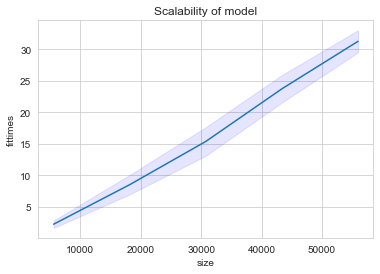

In [231]:
plt.plot(train_sizes,fit_times_mean)
plt.fill_between(train_sizes,fit_times_mean-fit_times_std,fit_times_mean+fit_times_std,color='blue',alpha=0.1)


plt.title("Scalability of model")
plt.xlabel("size")
plt.ylabel("fittimes")

plt.show()

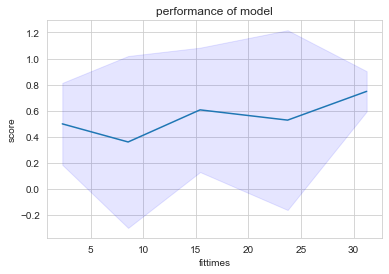

In [232]:
plt.plot(fit_times_mean, test_scores_mean)
plt.fill_between(fit_times_mean,test_scores_mean-test_scores_std,test_scores_mean+test_scores_std,color='blue',alpha=0.1)


plt.title("performance of model")
plt.xlabel("fittimes")
plt.ylabel("score")

plt.show()

In [56]:
new_rf2 = RandomForestRegressor(max_depth=6)
new_rf2.fit(X_train, Y_train)


RandomForestRegressor(max_depth=6)

In [57]:
new_rf2_pred = new_rf2.predict(X_test)
mean_squared_error(Y_test, new_rf2_pred, squared=False) 

0.5565504612003401

In [58]:
from sklearn.metrics import r2_score
r2_score(Y_test, new_rf2_pred) 

0.8611617024535598

In [60]:
train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(new_rf2, X, new_y, cv=10, n_jobs=4,
                       train_sizes=np.linspace(.1, 1.0, 5),
                       return_times=True)

In [61]:
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)


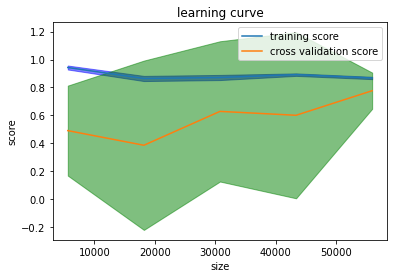

In [62]:
plt.plot(train_sizes,train_scores_mean,label="training score")
plt.fill_between(train_sizes,train_scores_mean-train_scores_std,train_scores_mean+train_scores_std,color='blue',alpha=0.5)
plt.plot(train_sizes,test_scores_mean,label='cross validation score')

plt.fill_between(train_sizes,test_scores_mean-test_scores_std,test_scores_mean+test_scores_std,color='green',alpha=0.5)



plt.title("learning curve")
plt.xlabel("size")
plt.ylabel("score")
plt.legend(loc="best")
plt.show()

In [64]:
pip install yellowbrick

In [65]:
from yellowbrick.model_selection import learning_curve

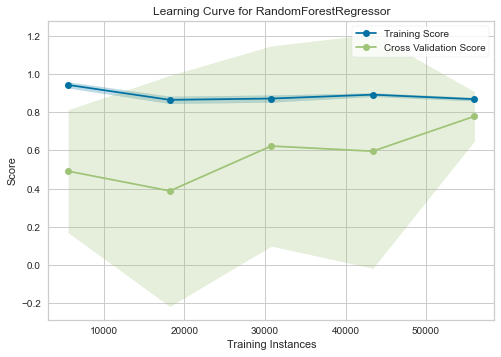

LearningCurve(ax=<AxesSubplot:title={'center':'Learning Curve for RandomForestRegressor'}, xlabel='Training Instances', ylabel='Score'>,
              cv=10, estimator=RandomForestRegressor(max_depth=6),
              scoring='r2')


In [66]:
print(learning_curve(new_rf2, X, new_y, cv=10, scoring='r2'))